In [3]:
import numpy as np
import seaborn as sns
import pylab as pl

In [4]:
from prune_v2 import clus_tree as ct

In [5]:
d1 = np.load('/NOBACKUP2/paquette/simulation_axcal/repack/data_Assaf_D16_d9_Gmax259.npy')
d2 = np.load('/NOBACKUP2/paquette/simulation_axcal/repack/data_Assaf_D28_d7_Gmax240.npy')
d3 = np.load('/NOBACKUP2/paquette/simulation_axcal/repack/data_Assaf_D40_d6_Gmax230.npy')
gt = np.load('/NOBACKUP2/paquette/simulation_axcal/TheParam.npy')

sc = np.genfromtxt('/NOBACKUP2/paquette/simulation_axcal/clus_stuff/dumb_scalling.txt')

In [6]:
def way1(i):
    return np.concatenate((d1[i],d2[i],d3[i]),axis=0)

def way2(i):
    return d1[i].tolist() + d2[i].tolist() + d3[i].tolist()

In [7]:
res = []

Nmin = 0
Nmax = d1.shape[0]

for i in range(Nmin,Nmax):
    res.append(ct(*way2(i)))
    if not i%100000:
        print('{} % :: {}/{}'.format(100*i/float(Nmax), i, Nmax))

results = np.array(res) / sc

0.0 % :: 0/3024450
3.30638628511 % :: 100000/3024450
6.61277257022 % :: 200000/3024450
9.91915885533 % :: 300000/3024450
13.2255451404 % :: 400000/3024450
16.5319314255 % :: 500000/3024450
19.8383177107 % :: 600000/3024450
23.1447039958 % :: 700000/3024450
26.4510902809 % :: 800000/3024450
29.757476566 % :: 900000/3024450
33.0638628511 % :: 1000000/3024450
36.3702491362 % :: 1100000/3024450
39.6766354213 % :: 1200000/3024450
42.9830217064 % :: 1300000/3024450
46.2894079915 % :: 1400000/3024450
49.5957942766 % :: 1500000/3024450
52.9021805618 % :: 1600000/3024450
56.2085668469 % :: 1700000/3024450
59.514953132 % :: 1800000/3024450
62.8213394171 % :: 1900000/3024450
66.1277257022 % :: 2000000/3024450
69.4341119873 % :: 2100000/3024450
72.7404982724 % :: 2200000/3024450
76.0468845575 % :: 2300000/3024450
79.3532708426 % :: 2400000/3024450
82.6596571277 % :: 2500000/3024450
85.9660434129 % :: 2600000/3024450
89.272429698 % :: 2700000/3024450
92.5788159831 % :: 2800000/3024450
95.8852022682

In [8]:
name = ['Din', 'R', 'Dpara', 'Dperp', 'fin', 'csf']

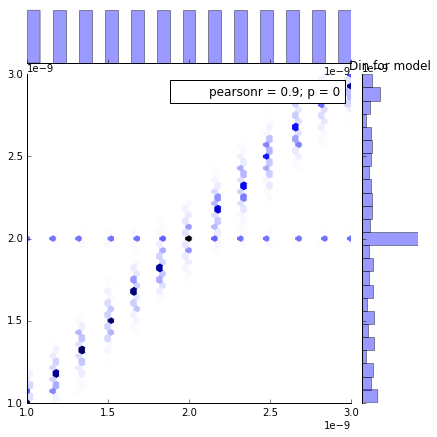

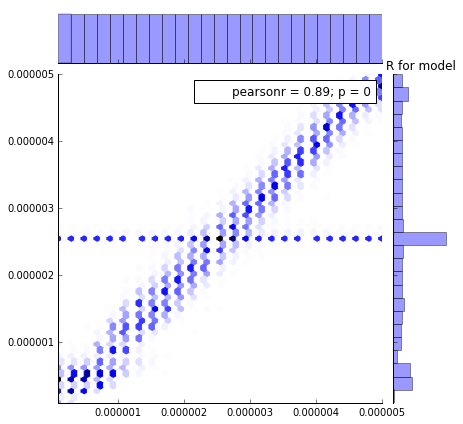

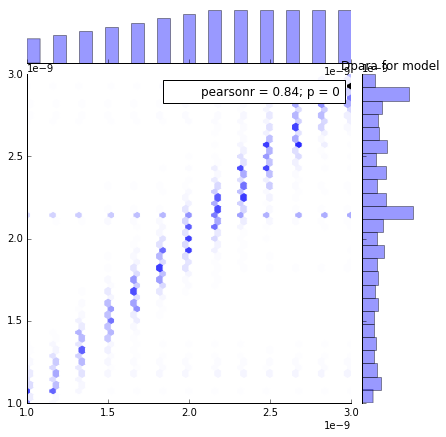

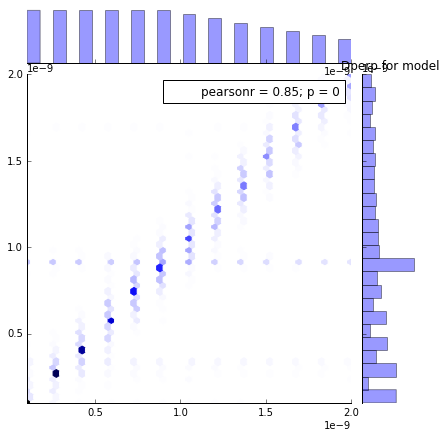

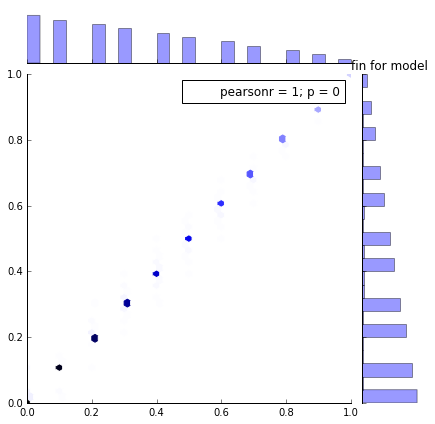

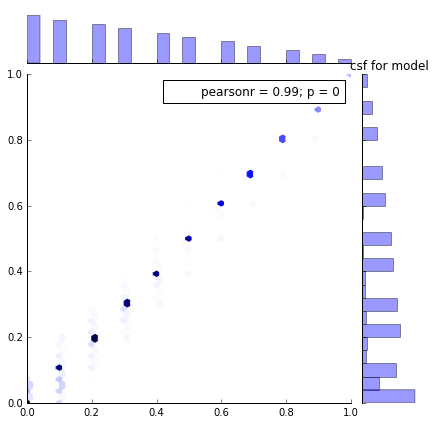

In [9]:
for i in range(gt.shape[1]):
    # pl.figure()
    sns.jointplot(x=gt[:,i], y=results[:,i], kind='hex', marginal_kws=dict(bins=len(set(gt[:,1]))))
    pl.title('{} for model'.format(name[i]))
pl.show()

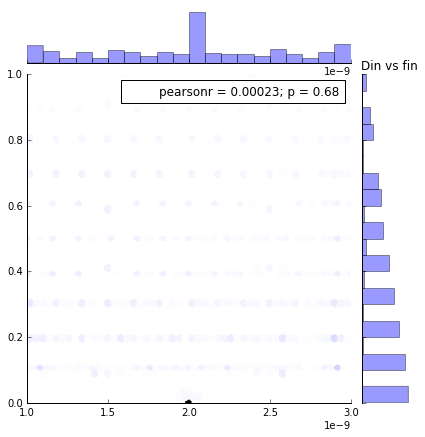

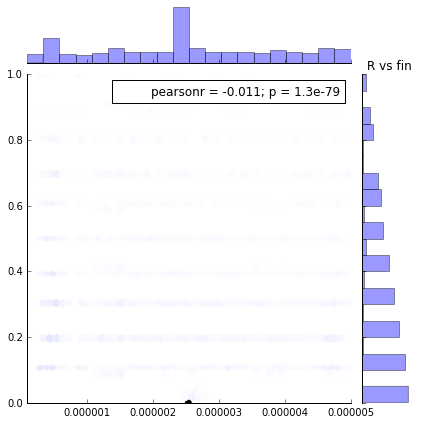

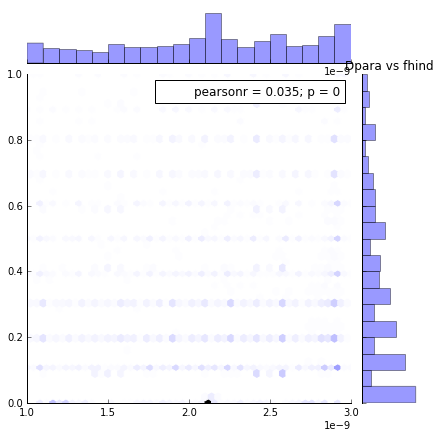

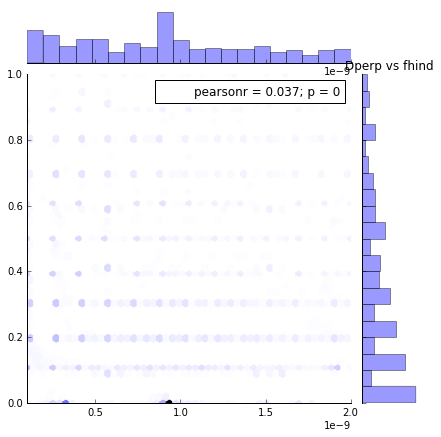

In [10]:
# confirming that artefact strips are at volume fraction of zero
sns.jointplot(x=results[:,0], y=results[:,4], kind='hex', marginal_kws=dict(bins=20))
pl.title('{} vs {}'.format(name[0],name[4]))

sns.jointplot(x=results[:,1], y=results[:,4], kind='hex', marginal_kws=dict(bins=20))
pl.title('{} vs {}'.format(name[1],name[4]))

sns.jointplot(x=results[:,2], y=1-(results[:,4]+results[:,5]), kind='hex', marginal_kws=dict(bins=20))
pl.title('{} vs {}'.format(name[2],'fhind'))

sns.jointplot(x=results[:,3], y=1-(results[:,4]+results[:,5]), kind='hex', marginal_kws=dict(bins=20))
pl.title('{} vs {}'.format(name[3],'fhind'))

pl.show()
